In [1]:
import os
import numpy as np
import pandas as pd
import librosa
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from tensorflow.keras.utils import to_categorical
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv1D, MaxPooling1D, Flatten, Dense, Dropout, LSTM, BatchNormalization, Reshape

# Lista de emociones correspondientes a cada clase
emociones = ['Felicidad', 'Tristeza', 'Sorpresa', 'Ira', 'Miedo', 'Desprecio', 'Disgusto', 'Neutralidad']


In [3]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler

# Cargar las características y etiquetas
df = pd.read_csv('extracted_features.csv')

# Separar las características y las etiquetas
X = df.drop('label', axis=1)
y = df['label']

# Codificar las etiquetas (transformar categorías en números)
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(y)

# Dividir los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Normalizar las características
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


In [10]:
import os
import librosa
import numpy as np
import pandas as pd

# Función para extraer características con timesteps de un archivo de audio
def extract_features_with_timesteps(file_name, n_timesteps=100):
    # Cargar el archivo de audio
    y, sr = librosa.load(file_name, sr=None)
    
    if len(y) == 0:
        print(f"Error: {file_name} no se pudo cargar o está vacío.")
        return np.array([])

    # Calcular hop_length para dividir el audio en `n_timesteps` ventanas
    hop_length = len(y) // n_timesteps
    
    # Extraer características para cada ventana
    mfccs = librosa.feature.mfcc(y=y, sr=sr, n_mfcc=13, hop_length=hop_length)
    chroma = librosa.feature.chroma_stft(y=y, sr=sr, hop_length=hop_length)
    spec_contrast = librosa.feature.spectral_contrast(y=y, sr=sr, hop_length=hop_length)
    tonnetz = librosa.feature.tonnetz(y=librosa.effects.harmonic(y), sr=sr, hop_length=hop_length)
    
    # Combinar características para cada timestep
    features = np.hstack([mfccs.T, chroma.T, spec_contrast.T, tonnetz.T])
    
    return features

# Directorio donde se encuentran tus archivos de audio
audio_dir = 'data/audio'
features_list = []
labels_list = []

# Recorrer todos los directorios y subdirectorios
for root, dirs, files in os.walk(audio_dir):
    for file_name in files:
        if file_name.endswith('.wav'):
            file_path = os.path.join(root, file_name)
            print(f"Procesando archivo: {file_path}")
            
            # Extraer características del archivo de audio
            features = extract_features_with_timesteps(file_path, n_timesteps=100)
            if features.size > 0:
                features_list.append(features)
                label = file_name.split('-')[2]  # Ajustar esto según cómo se definan tus etiquetas
                labels_list.append(label)
            else:
                print(f"Error al extraer características de {file_name}")

# Convertir las listas a matrices NumPy
X = np.array(features_list)
y = np.array(labels_list)

# Verifica la forma de X para asegurarte de que tiene la estructura correcta
print(X.shape)  # Esto debería mostrar (n_samples, n_timesteps, n_features_por_timestep)

# Aplanar las características para cada muestra
n_samples, n_timesteps, n_features = X.shape
X_flat = X.reshape(n_samples, n_timesteps * n_features)

# Crear un DataFrame combinando las características con las etiquetas
df = pd.DataFrame(X_flat)
df['label'] = y

# Guardar el DataFrame en un archivo CSV
output_file = 'audio_features_ravdess_def.csv'
df.to_csv(output_file, index=False)

print(f"Características y etiquetas guardadas en {output_file}")


Procesando archivo: data/audio/Actor_16/03-01-05-01-02-01-16.wav
Procesando archivo: data/audio/Actor_16/03-01-06-01-02-02-16.wav
Procesando archivo: data/audio/Actor_16/03-01-06-02-01-02-16.wav
Procesando archivo: data/audio/Actor_16/03-01-05-02-01-01-16.wav
Procesando archivo: data/audio/Actor_16/03-01-07-01-01-01-16.wav
Procesando archivo: data/audio/Actor_16/03-01-04-01-01-02-16.wav
Procesando archivo: data/audio/Actor_16/03-01-04-02-02-02-16.wav
Procesando archivo: data/audio/Actor_16/03-01-07-02-02-01-16.wav
Procesando archivo: data/audio/Actor_16/03-01-08-02-02-01-16.wav
Procesando archivo: data/audio/Actor_16/03-01-08-01-01-01-16.wav
Procesando archivo: data/audio/Actor_16/03-01-03-02-02-02-16.wav
Procesando archivo: data/audio/Actor_16/03-01-03-01-01-02-16.wav
Procesando archivo: data/audio/Actor_16/03-01-02-02-01-01-16.wav
Procesando archivo: data/audio/Actor_16/03-01-01-01-02-02-16.wav
Procesando archivo: data/audio/Actor_16/03-01-02-01-02-01-16.wav
Procesando archivo: data/

/var/folders/pv/hj1tkdtn4xd2lk842kp9xy7r0000gn/T/ipykernel_4248/3333143054.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=label_counts.index, y=label_counts.values, palette="viridis")


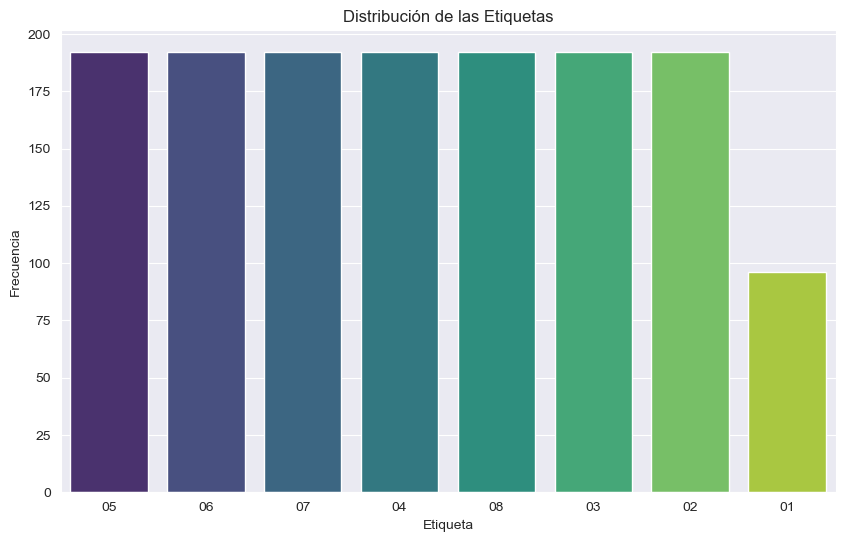

In [5]:
import matplotlib.pyplot as plt
import seaborn as sns

# Convertir las etiquetas a un DataFrame para facilitar el gráfico
labels_df = pd.DataFrame(y, columns=['label'])

# Contar la frecuencia de cada etiqueta
label_counts = labels_df['label'].value_counts()

# Crear un gráfico de barras para la distribución de las etiquetas
plt.figure(figsize=(10, 6))
sns.barplot(x=label_counts.index, y=label_counts.values, palette="viridis")
plt.title('Distribución de las Etiquetas')
plt.xlabel('Etiqueta')
plt.ylabel('Frecuencia')
plt.show()


## Guardar los datos con las features extraídas

In [ ]:
# Verificar si la función extrae características correctamente
test_file = 'data/audio/Actor_08/03-01-01-01-02-02-08.wav'# Cambia esto a un archivo específico
features = extract_features_with_timesteps(test_file, n_timesteps=100)
print(features.shape)  # Esto debería mostrar algo como (n_timesteps, n_features)

In [6]:
import numpy as np

# Assuming y is already defined as an array of labels
y = np.array(labels_list)

# Find the unique classes and count them
unique_classes = np.unique(y)
num_classes = len(unique_classes)

# Print the results
print(f"Number of unique classes in y: {num_classes}")
print(f"Unique classes: {unique_classes}")


Number of unique classes in y: 8
Unique classes: ['01' '02' '03' '04' '05' '06' '07' '08']


## DIVIDIR EN TRAIN VALIDATON Y TEST


In [ ]:
from sklearn.model_selection import train_test_split

# Dividir los datos en entrenamiento y prueba (80% - 20%)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Opcional: Dividir el conjunto de entrenamiento en entrenamiento y validación (70% - 10%)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=4)


In [ ]:
import numpy as np

# Guardar los arrays por separado
np.save('X_train.npy', X_train)
np.save('y_train.npy', y_train)
np.save('X_val.npy', X_val)
np.save('y_val.npy', y_val)
np.save('X_test.npy', X_test)
np.save('y_test.npy', y_test)


## CARGAR LOS DATOS DESDE LOS FILES

In [ ]:
# Cargar los arrays por separado
X_train = np.load('X_train.npy')
y_train = np.load('y_train.npy')
X_val = np.load('X_val.npy')
y_val = np.load('y_val.npy')
X_test = np.load('X_test.npy')
y_test = np.load('y_test.npy')


In [ ]:
print(y_train.dtype)
print(y_val.dtype)

import numpy as np

print(np.unique(y_train))
print(np.unique(y_val))


# Convertir las etiquetas de cadenas a enteros
y_train = y_train.astype(np.int64)
y_val = y_val.astype(np.int64)
y_test = y_test.astype(np.int64)


# Verificar los cambios
print(y_train.dtype)
print(y_val.dtype)
print(np.unique(y_train))
print(np.unique(y_val))

print(y_test.dtype)  # Debería mostrar int64
print(np.unique(y_test))  # Verifica los valores únicos para asegurar que estén en el rango correcto


In [ ]:


# Verificar los valores únicos después del ajuste
print(np.unique(y_train))
print(np.unique(y_val))


In [ ]:

# Definir el modelo
model = Sequential()

# Primera capa LSTM
model.add(LSTM(128, return_sequences=True, input_shape=(X_train.shape[1], X_train.shape[2])))
model.add(Dropout(0.3))  # Regularización para evitar el sobreajuste

# Segunda capa LSTM
model.add(LSTM(128))
model.add(Dropout(0.3))

# Capa densa final
model.add(Dense(32, activation='relu'))

# Capa de salida
model.add(Dense(len(np.unique(y)), activation='softmax'))  # Ajustar el número de salidas a tu número de clases

# Compilar el modelo
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Resumen del modelo
model.summary()

In [ ]:
import numpy as np

# Contar el número de clases en y_train
num_clases_train = len(np.unique(y_train))
print(f'Número de clases en y_train: {num_clases_train}')
print(f'Clases únicas en y_train: {np.unique(y_train)}')

# Contar el número de clases en y_val
num_clases_val = len(np.unique(y_val))
print(f'Número de clases en y_val: {num_clases_val}')
print(f'Clases únicas en y_val: {np.unique(y_val)}')


In [ ]:
# Restar 1 a las etiquetas para que estén en el rango [0, 7]
y_train = y_train - 1
y_val = y_val - 1

# Verificar que las clases ahora estén en el rango correcto
print(f'Clases únicas en y_train después de la corrección: {np.unique(y_train)}')
print(f'Clases únicas en y_val después de la corrección: {np.unique(y_val)}')


In [ ]:
history = model.fit(X_train, y_train, epochs=50, batch_size=32, validation_data=(X_val, y_val))


## EVALUAR EL MODELO

In [ ]:
# Revisar los primeros elementos de y_test para ver si hay algo inusual
print(y_test[:10])
y_test = y_test - 1

# Intentar convertir nuevamente
y_test = np.array([int(label) for label in y_test])
print(y_test.dtype)  # Debería mostrar int64


In [ ]:
# Evaluar el modelo en el conjunto de prueba
test_loss, test_acc = model.evaluate(X_test, y_test)
print(f'Pérdida en el conjunto de prueba: {test_loss:.4f}')
print(f'Precisión en el conjunto de prueba: {test_acc:.4f}')


In [ ]:
# Evaluar el modelo en el conjunto de prueba
loss, accuracy = model.evaluate(X_test, y_test, verbose=1)
print(f'Accuracy en el conjunto de prueba: {accuracy*100:.2f}%')


In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Generar las predicciones del modelo
y_pred = model.predict(X_test)
y_pred_classes = np.argmax(y_pred, axis=1)  # Obtener la clase predicha

# Generar la matriz de confusión
cm = confusion_matrix(y_test, y_pred_classes)

# Visualizar la matriz de confusión con etiquetas de emoción
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=emociones, yticklabels=emociones)
plt.xlabel('Predicción')
plt.ylabel('Verdadero')
plt.title('Matriz de Confusión con Etiquetas de Emoción')
plt.show()
